In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston_house_dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
print(boston_house_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [4]:
boston_house_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
y = pd.DataFrame(boston.target,columns=["Price"])

In [15]:
y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [16]:
X = boston_house_dataset

In [18]:
X =boston_house_dataset

In [19]:
X_train, X_test, y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.2)

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7890585214902488

In [25]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
Rid = Ridge(alpha=0.001)
Rid.fit(X_train,y_train)
Rid.score(X_test,y_test)

0.7890576197837558

In [26]:
Rid001 = Ridge(alpha=0.01)
Rid001.fit(X_train,y_train)
Rid001.score(X_test,y_test)

0.7890489123370115

In [27]:
Rid100 = Ridge(alpha=100)
Rid100.fit(X_train,y_train)
Rid100.score(X_test,y_test)

0.7409165836100632

In [28]:
Rid200 = Ridge(alpha=200)
Rid200.fit(X_train,y_train)
Rid200.score(X_test,y_test)

0.7238543066947478

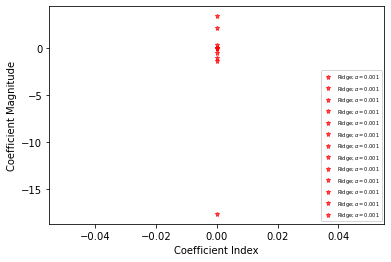

In [37]:
plt.plot(Rid.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$') 

plt.xlabel('Coefficient Index',fontsize=10)
plt.ylabel('Coefficient Magnitude',fontsize=10)
plt.legend(fontsize=5,loc=4)
plt.show()

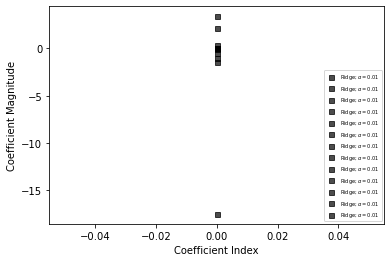

In [38]:
plt.plot(Rid001.coef_,alpha=0.7,linestyle='none',marker='s',markersize=5,color='black',label=r'Ridge; $\alpha = 0.01$')
plt.xlabel('Coefficient Index',fontsize=10)
plt.ylabel('Coefficient Magnitude',fontsize=10)
plt.legend(fontsize=5,loc=4)
plt.show()


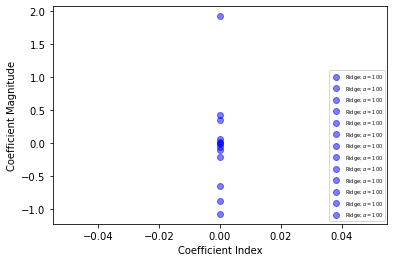

In [39]:
plt.plot(Rid100.coef_,alpha=0.5,linestyle='none',marker='o',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.xlabel('Coefficient Index',fontsize=10)
plt.ylabel('Coefficient Magnitude',fontsize=10)
plt.legend(fontsize=5,loc=4)
plt.show()


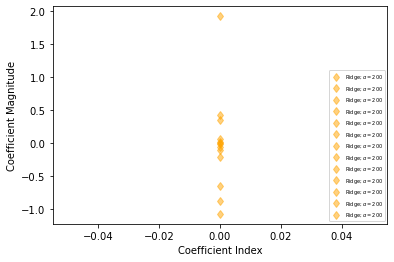

In [40]:
plt.plot(Rid100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='orange',label=r'Ridge; $\alpha = 200$')
plt.xlabel('Coefficient Index',fontsize=10)
plt.ylabel('Coefficient Magnitude',fontsize=10)
plt.legend(fontsize=5,loc=4)
plt.show()


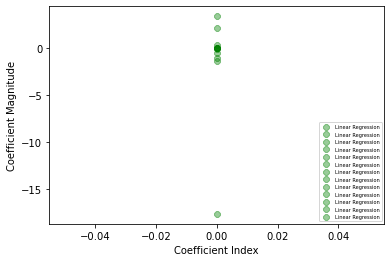

In [41]:
plt.plot(model.coef_,alpha=0.4,linestyle='none',marker='8',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=10)
plt.ylabel('Coefficient Magnitude',fontsize=10)
plt.legend(fontsize=5,loc=4)
plt.show()